In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("D:/ExcelR/ML/Project/notebook/data/stud.csv")

In [7]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.shape

(1000, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [17]:
df.duplicated().sum()

0

In [19]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [21]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [67]:
sns.set_palette('pastel')

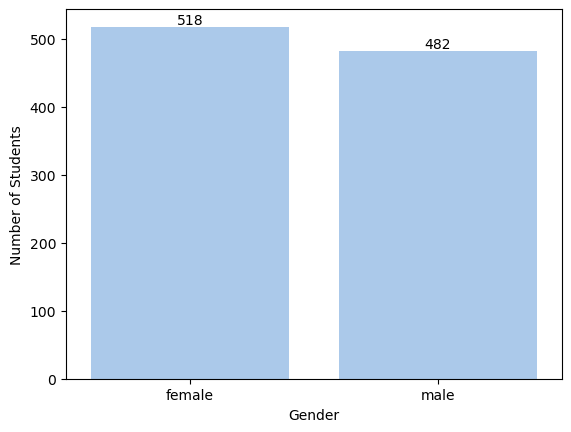

In [91]:
ax = sns.countplot(x="gender",data=df)
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.show()

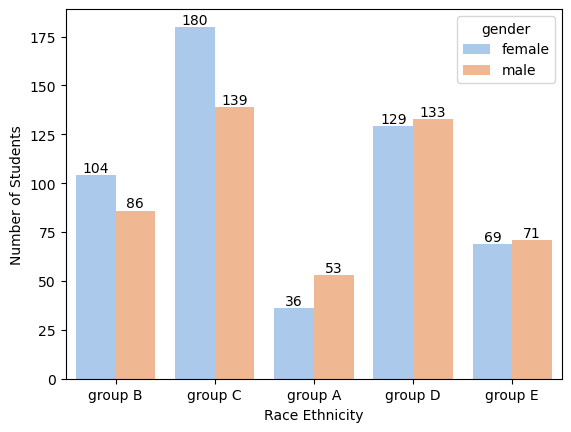

In [93]:
ax = sns.countplot(x="race_ethnicity",data=df,hue="gender")
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Race Ethnicity')
plt.ylabel('Number of Students')
plt.show()

In [37]:
labels = df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [55]:
values = []
a = df['parental_level_of_education'].nunique()
for i in range(a):
    values.append(df['parental_level_of_education'].value_counts().iloc[i])

[226, 222, 196, 179, 118, 59]

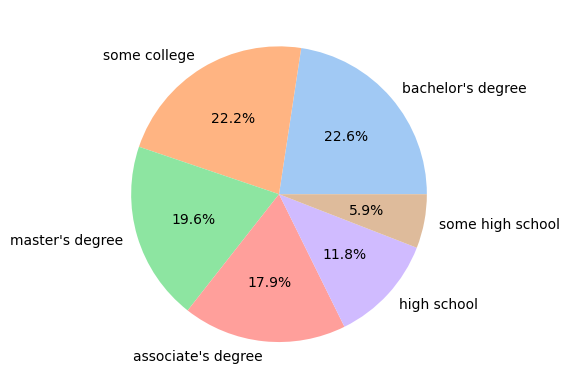

In [65]:
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.show()

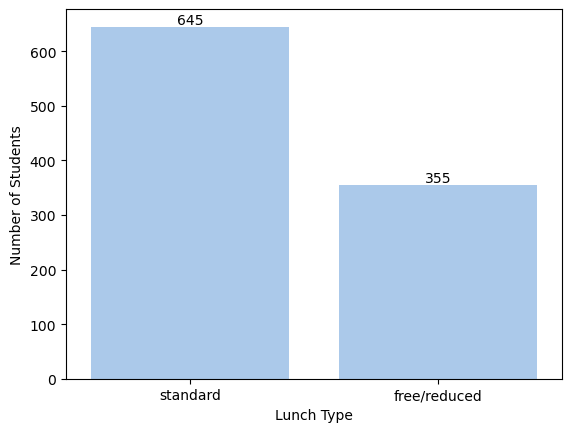

In [95]:
ax = sns.countplot(x="lunch",data=df)
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Lunch Type')
plt.ylabel('Number of Students')
plt.show()

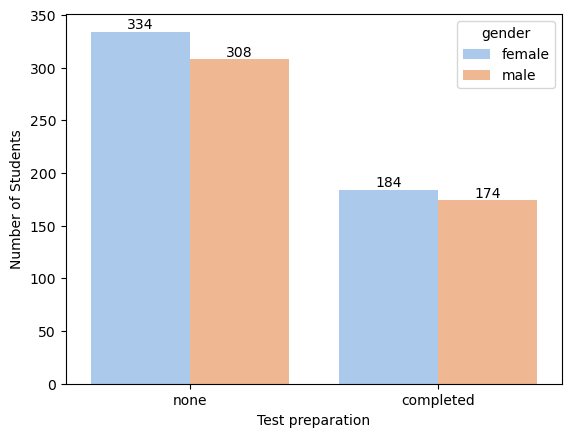

In [97]:
ax = sns.countplot(x="test_preparation_course",data=df,hue="gender")
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Test preparation')
plt.ylabel('Number of Students')
plt.show()

In [75]:
numeric_col = df.select_dtypes(exclude='object').columns
numeric_col

Index(['math_score', 'reading_score', 'writing_score'], dtype='object')

In [77]:
categorical_col = df.select_dtypes(include='object').columns
categorical_col

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')

In [79]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [81]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

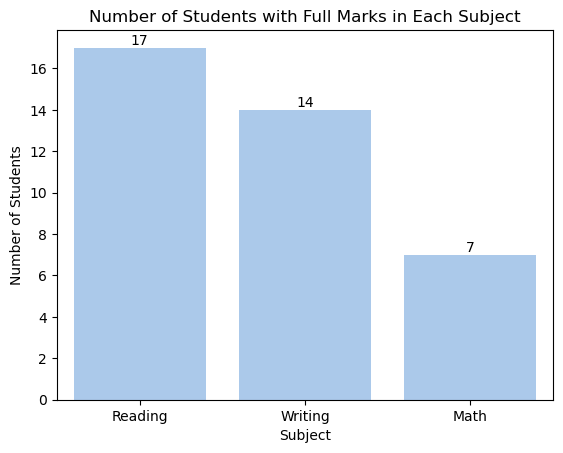

In [99]:
data = {'Subject': ['Reading', 'Writing', 'Math'], 'Full Marks': [reading_full, writing_full, math_full]}
df_graph = pd.DataFrame(data)
ax = sns.barplot(x='Subject', y='Full Marks', data=df_graph)
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.title('Number of Students with Full Marks in Each Subject')
plt.show()

In [101]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

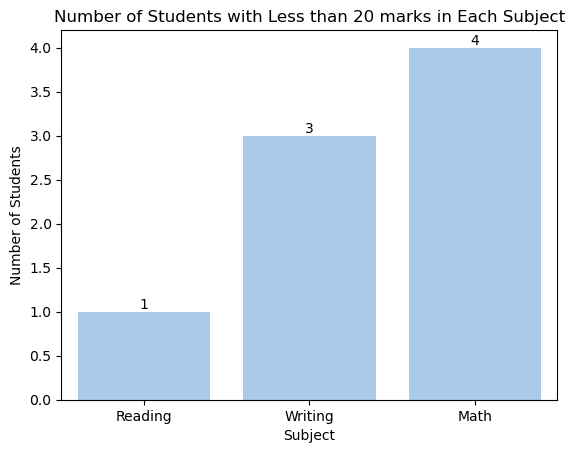

In [103]:
data = {'Subject': ['Reading', 'Writing', 'Math'], 'Less Marks': [reading_less_20, writing_less_20, math_less_20]}
df_graph = pd.DataFrame(data)
ax = sns.barplot(x='Subject', y='Less Marks', data=df_graph)
for container in ax.containers:
  ax.bar_label(container)
plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.title('Number of Students with Less than 20 marks in Each Subject')
plt.show()

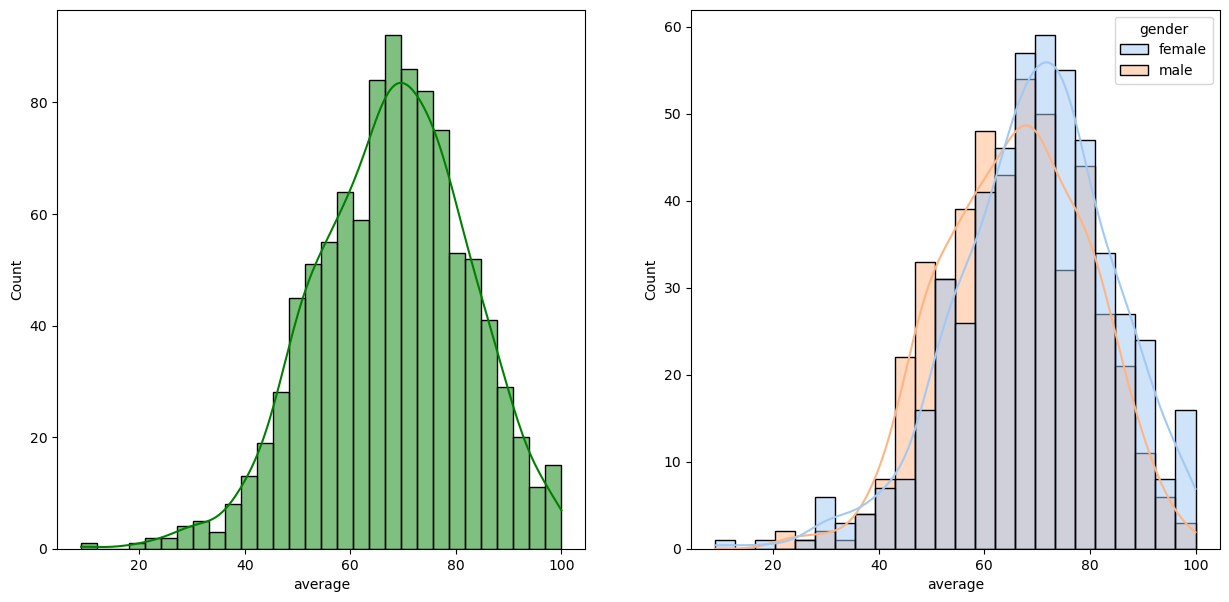

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

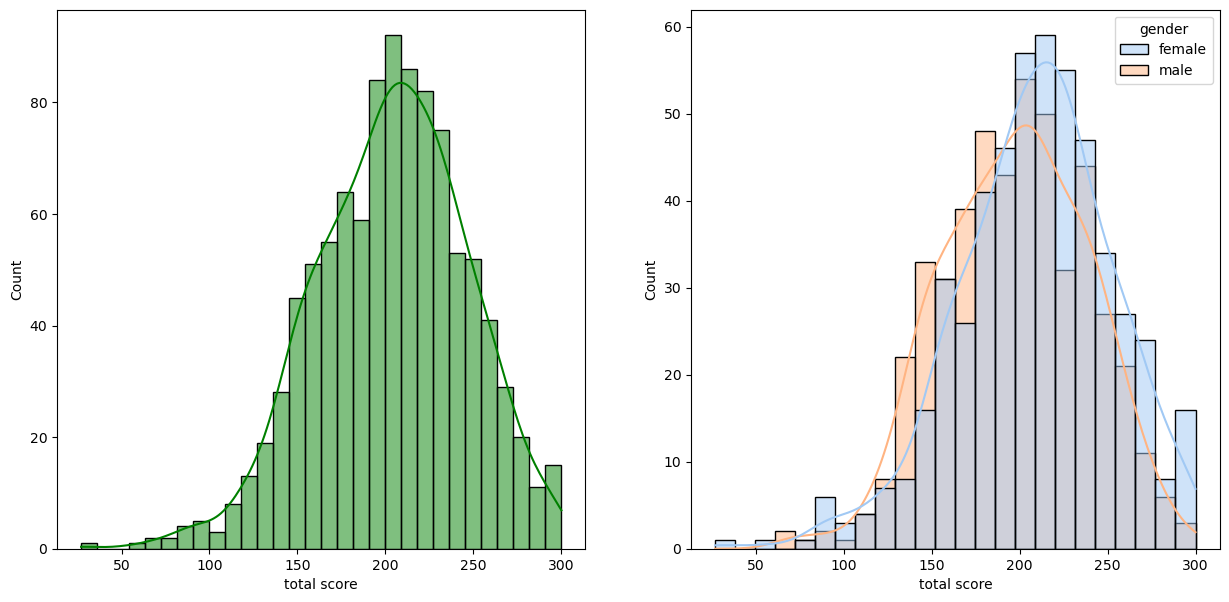

In [121]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Female students tend to perform well then male students.

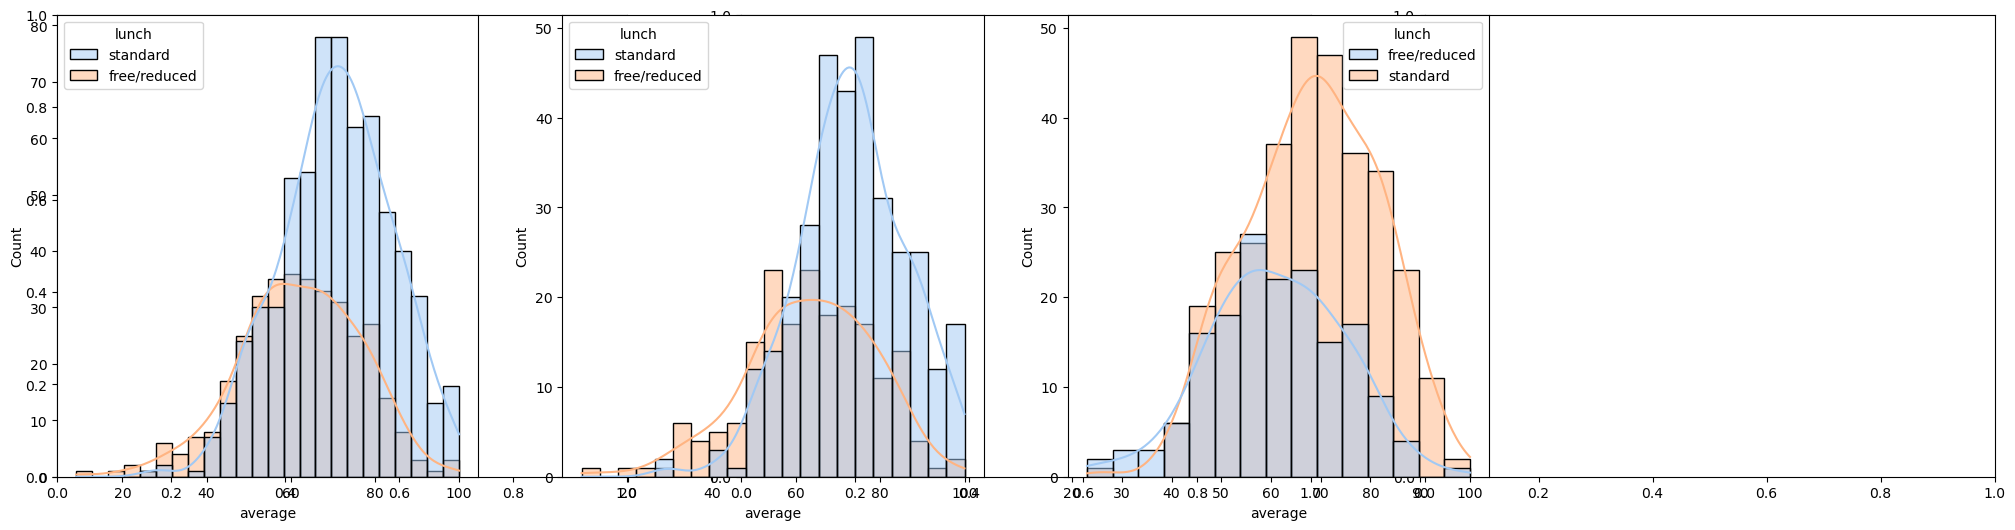

In [123]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

In [ ]:
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

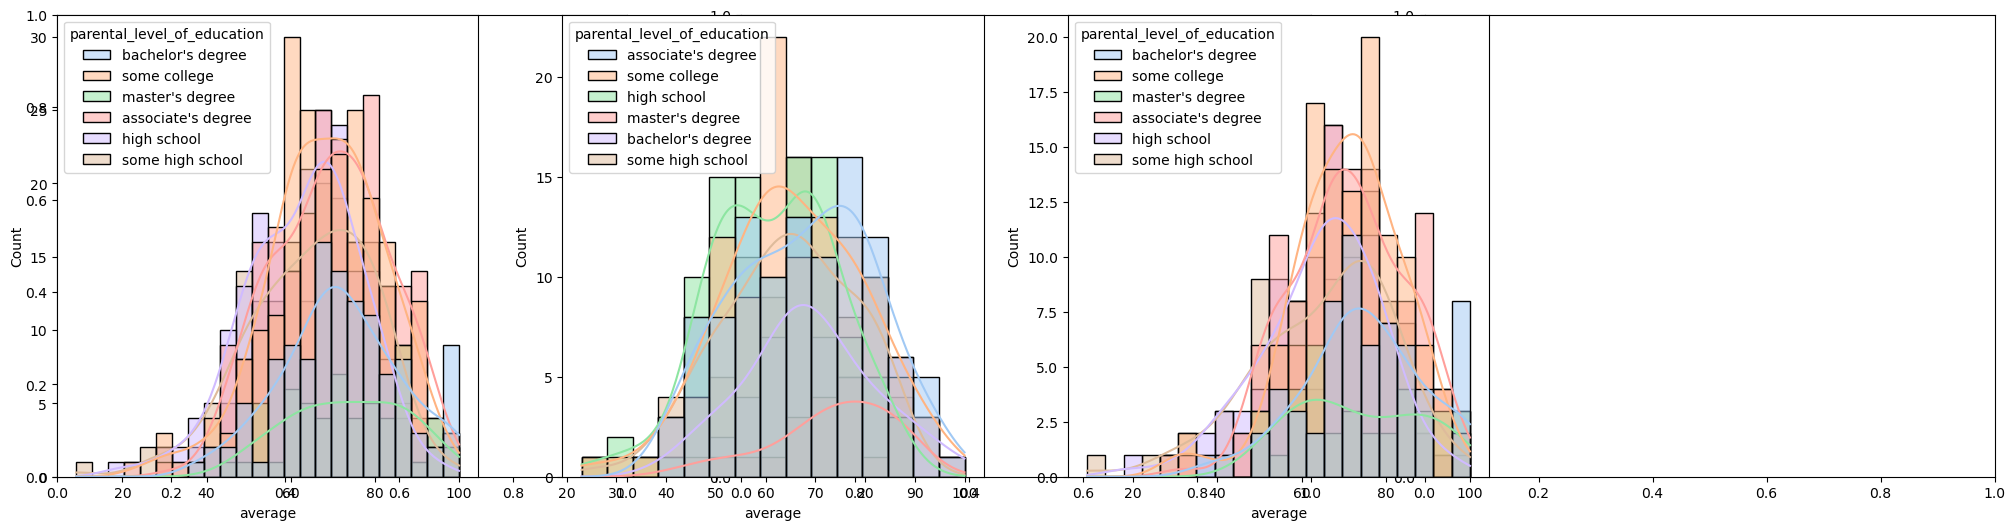

In [127]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [ ]:
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

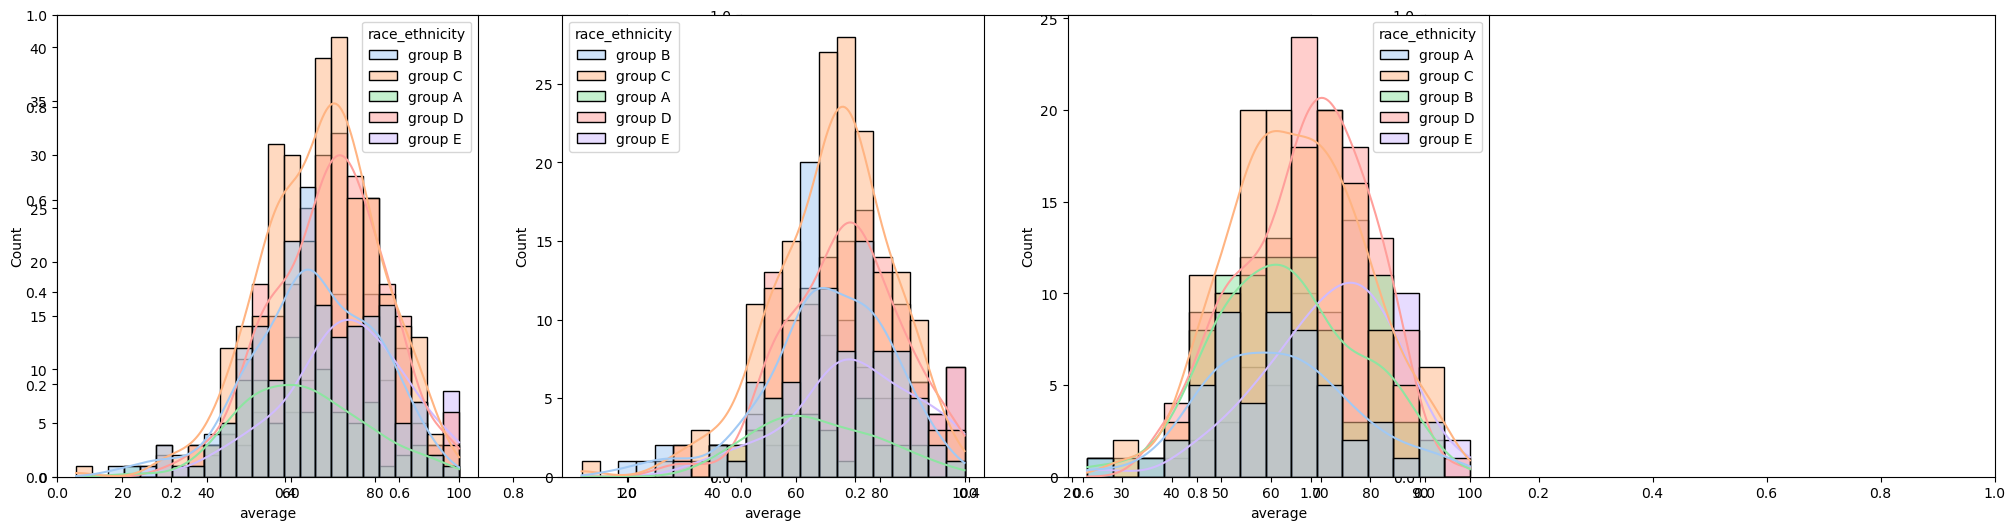

In [131]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

Students of group A and group B tends to perform poorly in exam.
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

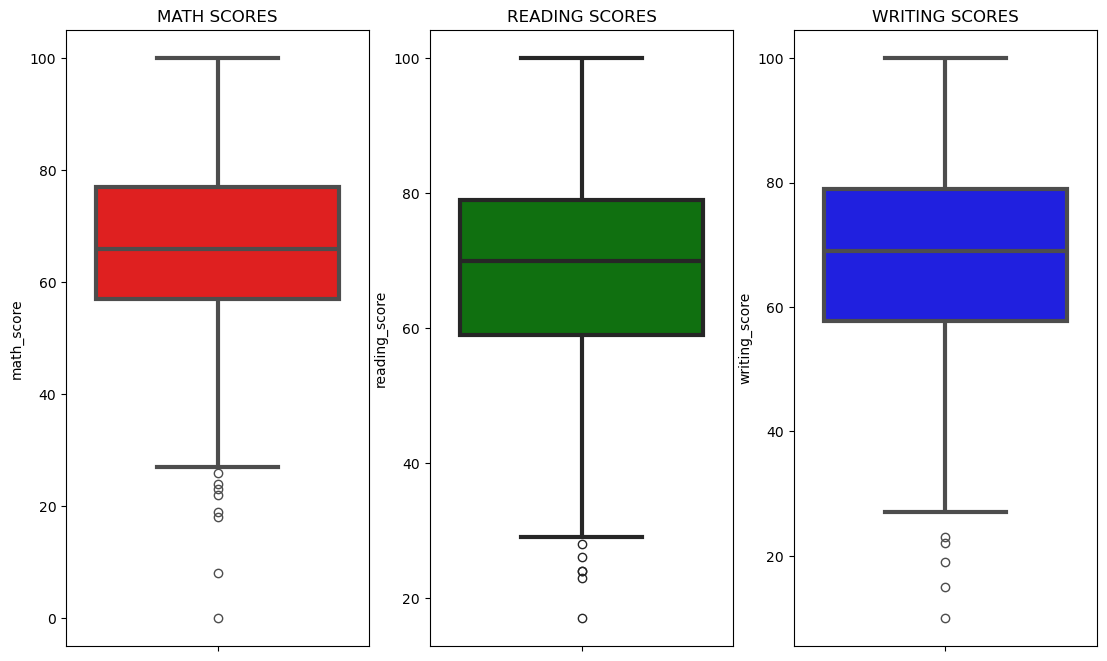

In [137]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [200]:
df_melt = df.melt(id_vars='gender', value_vars=['math_score', 'reading_score', 'writing_score'], 
                  var_name='subject', value_name='score')
df_melt

,gender,subject,score
0,female,math_score,72
1,female,math_score,69
2,female,math_score,90
3,male,math_score,47
4,male,math_score,76
...,...,...,...
2995,female,writing_score,95
2996,male,writing_score,55
2997,female,writing_score,65
2998,female,writing_score,77


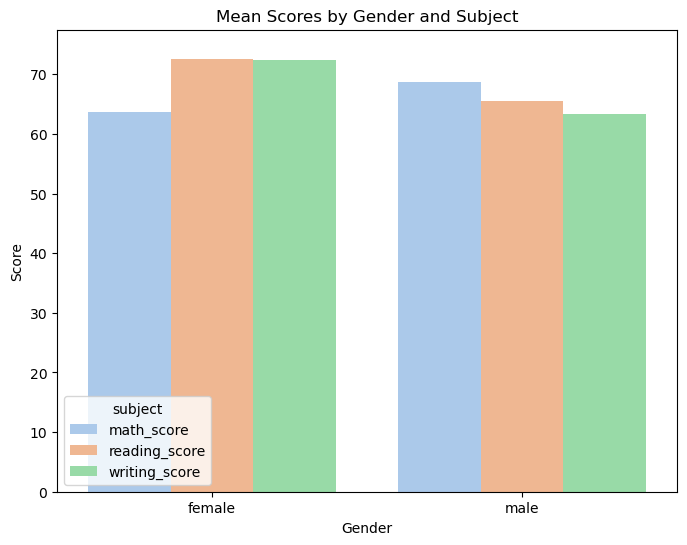

In [202]:
# Bar Plot showing the mean score for each subject by gender
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melt, x='gender', y='score', hue='subject',err_kws={'linewidth':0})
plt.title('Mean Scores by Gender and Subject')
plt.ylabel('Score')
plt.xlabel('Gender')
plt.show()

In [176]:
df_melt = df.melt(id_vars='race_ethnicity', value_vars=['math_score', 'reading_score', 'writing_score'], 
                  var_name='subject', value_name='score')
df_melt

,race_ethnicity,subject,score
0,group B,math_score,72
1,group C,math_score,69
2,group B,math_score,90
3,group A,math_score,47
4,group C,math_score,76
...,...,...,...
2995,group E,writing_score,95
2996,group C,writing_score,55
2997,group C,writing_score,65
2998,group D,writing_score,77


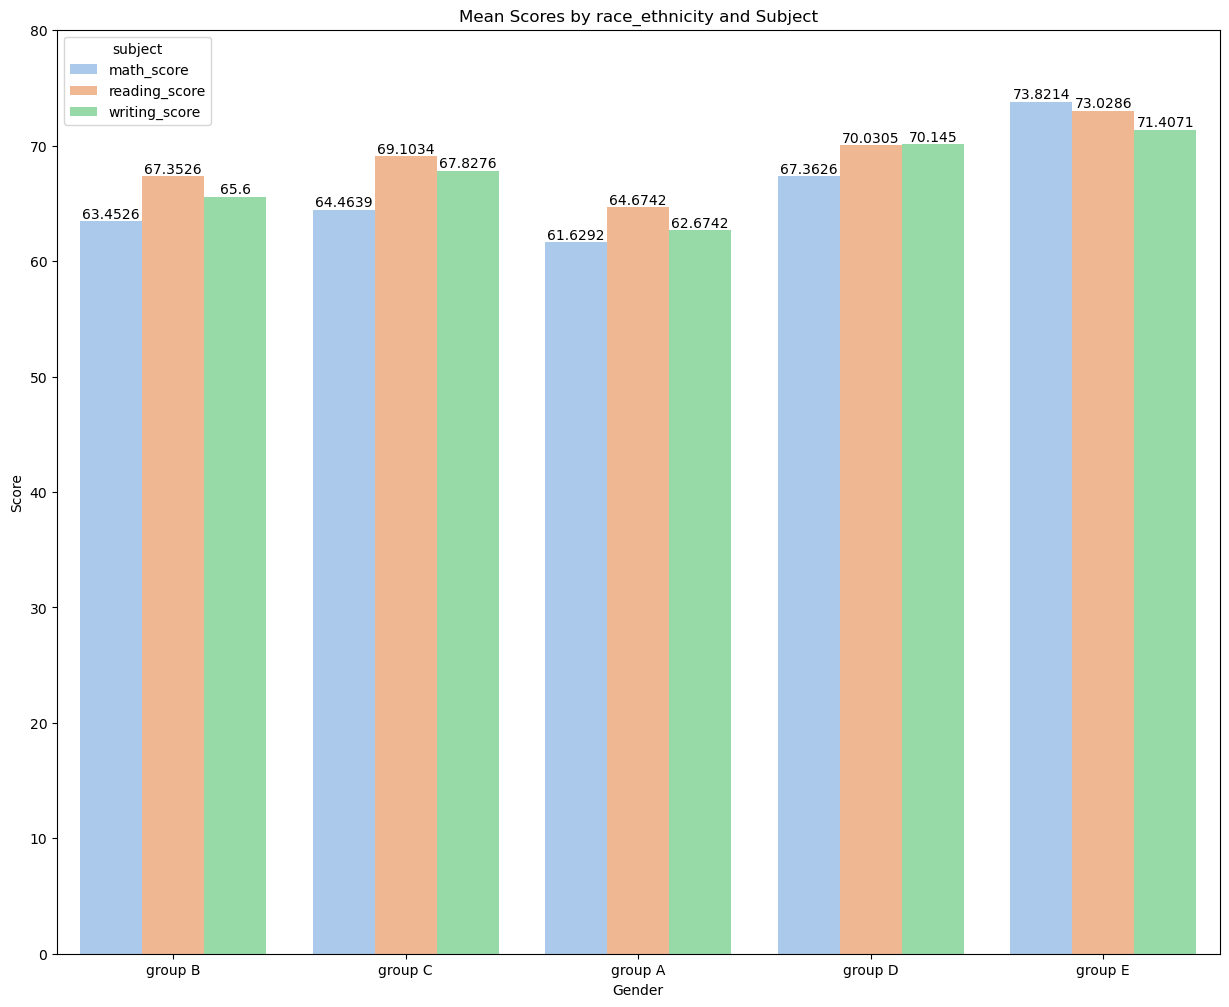

In [194]:
# Bar Plot showing the mean score for each subject by gender
plt.figure(figsize=(15, 12))
ax = sns.barplot(data=df_melt, x='race_ethnicity', y='score', hue='subject',err_kws={'linewidth':0})
for container in ax.containers:
  ax.bar_label(container)
plt.title('Mean Scores by race_ethnicity and Subject')
plt.ylabel('Score')
plt.xlabel('Gender')
plt.show()

Group E students have scored the highest marks.
Group A students have scored the lowest marks.
Students from a lower Socioeconomic status have a lower avg in all course subjects

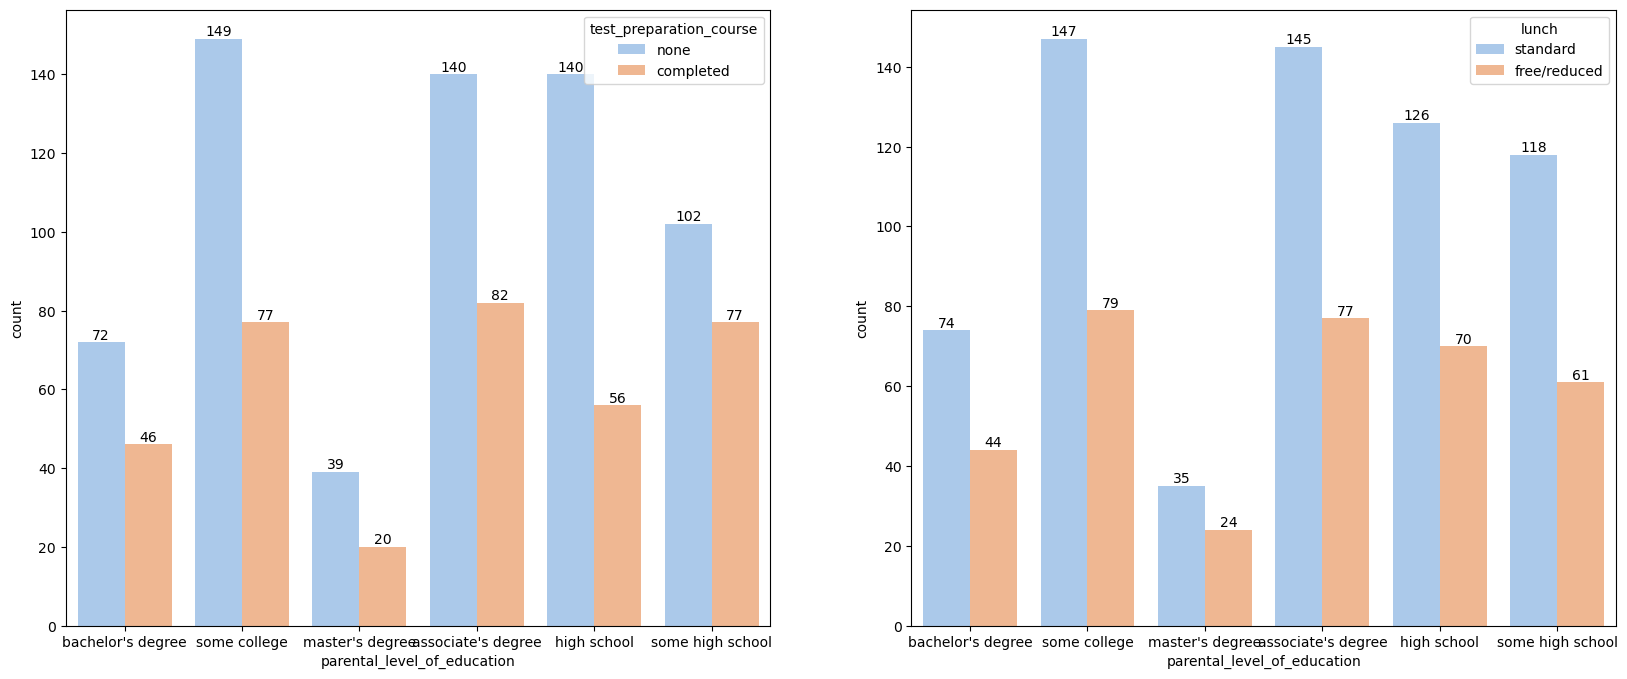

In [218]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,hue='test_preparation_course',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
    
sns.countplot(x=df['parental_level_of_education'],data=df,hue='lunch',ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container)   

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing_score'>

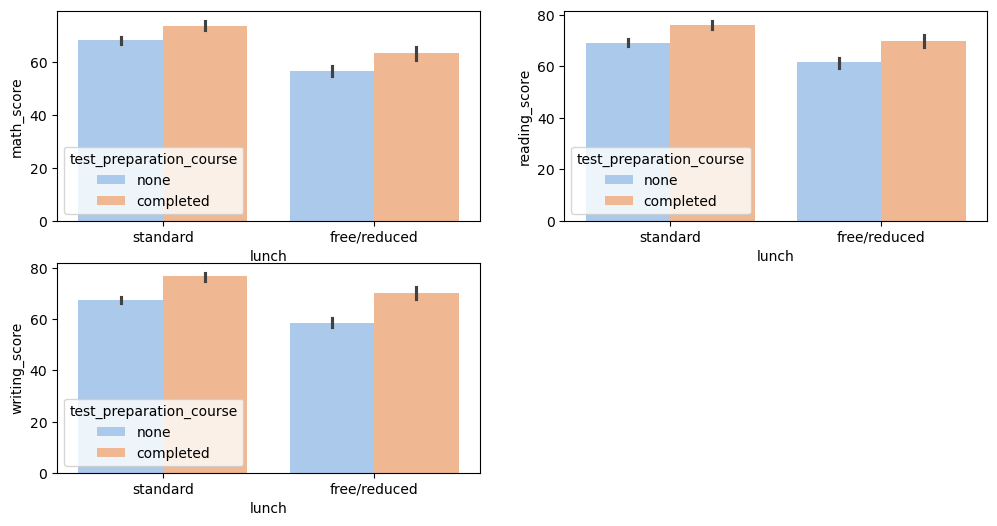

In [220]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

In [ ]:
Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

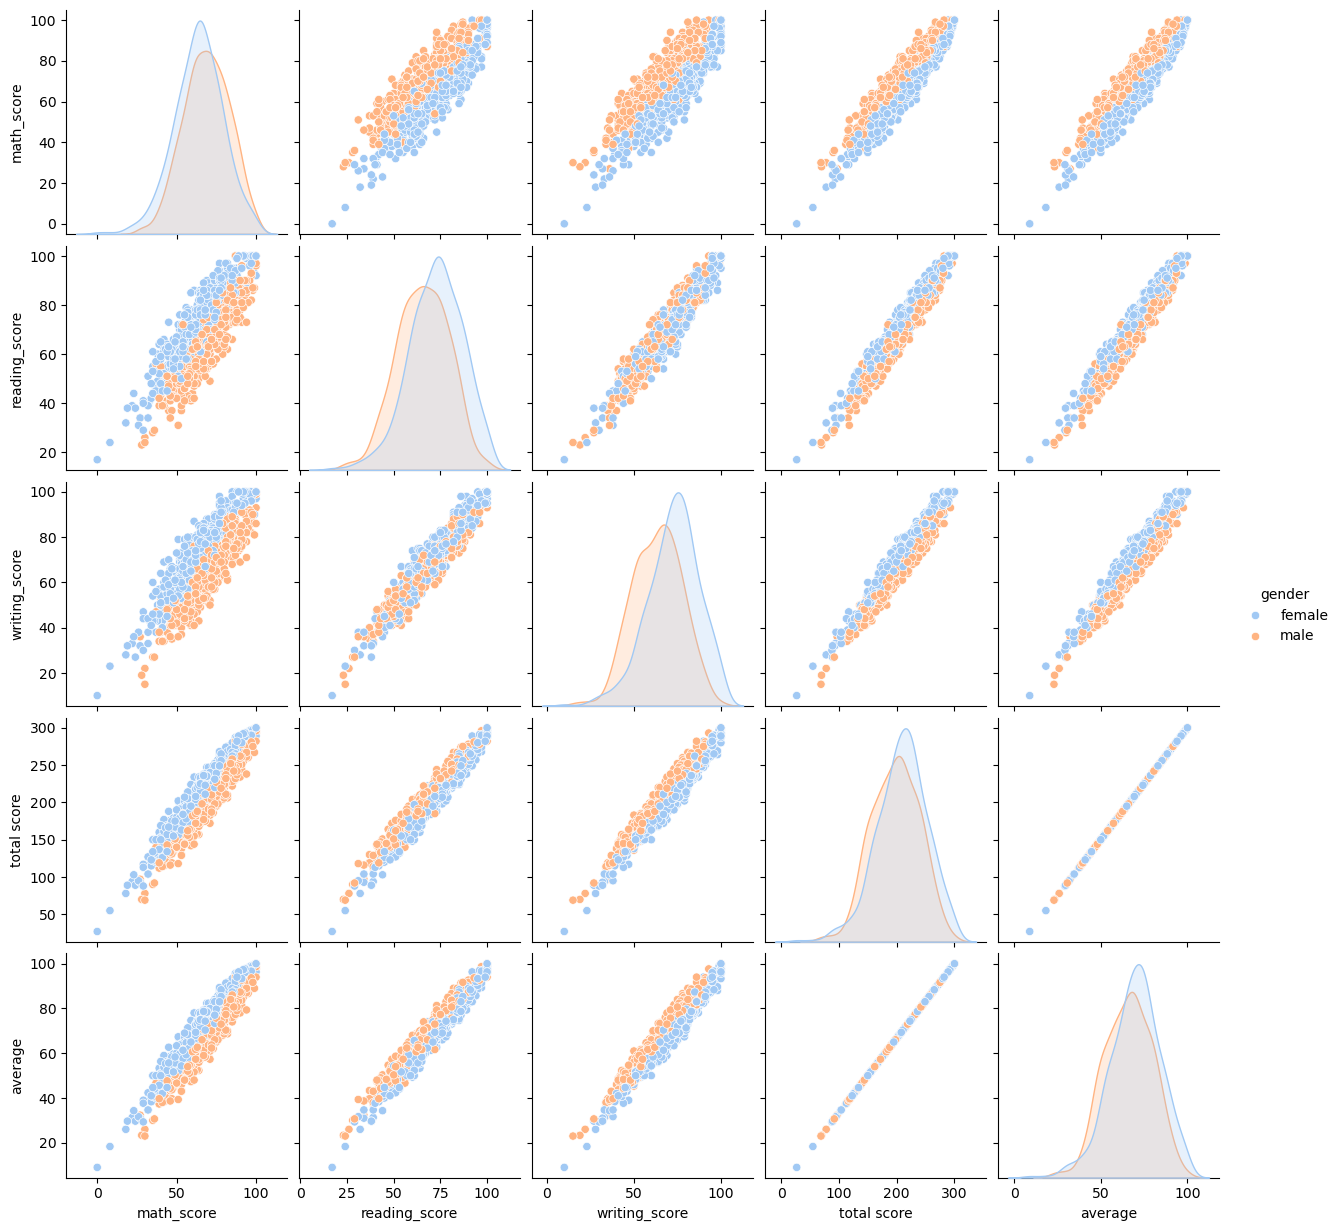

In [226]:
sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.

In [ ]:
Student's Performance is related with lunch, race, parental level education
Females lead in pass percentage and also are top-scorers
Student's Performance is not much related with test preparation course
Finishing preparation course is benefitial.